<a href="https://colab.research.google.com/github/vinicius-mattoso/churn_project/blob/main/ChurnEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import LabelEncoder

### Criação de funções auxiliares

In [46]:
def plot_percentual_empilhado(columns_to_plot, super_title, subplot_WIDTH = 14):
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # Criação do plot externo
    fig = plt.figure(figsize=(subplot_WIDTH, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22,  y=.95)

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # Criação dos subplots
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,rot=0, color=list_cor_plots_churn)

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Análise com base em ' + column,fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

In [68]:
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df.Churn)

#### Variaveis auxiliares

In [47]:
list_cor_plots_churn = ['skyblue','tomato']

## Carregar a base de dados

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/vinicius-mattoso/churn_project/main/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Avaliação de dados faltantes em cada coluna

In [49]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Avaliação dos tipos de dados existentes

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Corrigir a coluna "Total Charges" para o tipo float

In [51]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [64]:
for column in df.columns:
  if df[column].dtype != 'object':
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: SeniorCitizen - Unique Values: [0 1]
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: MonthlyCharges - Unique Values: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Column: TotalCharges - Unique Values: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


### Avaliação dos rótulos unicos existentes nas colunas do tipo object

In [52]:
for column in df.columns:
  if df[column].dtype == 'object':
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSupport - Unique Values: ['No' 'Yes' 'No internet service']
Column: StreamingTV - Unique Values: ['No' 'Yes' 'No internet service']
Column: StreamingMovies - Unique Values: ['No' 'Yes' 'No internet service']
Column: Contract - Unique Values: ['Month-to-month' 'One year' 'Two year']
Column: PaperlessBilling

### Remover a coluna de ID pois não é necessária

In [53]:
df.drop(columns='customerID', inplace=True)

### Visualização gráfica dos dados existentes

* Dados categóricos

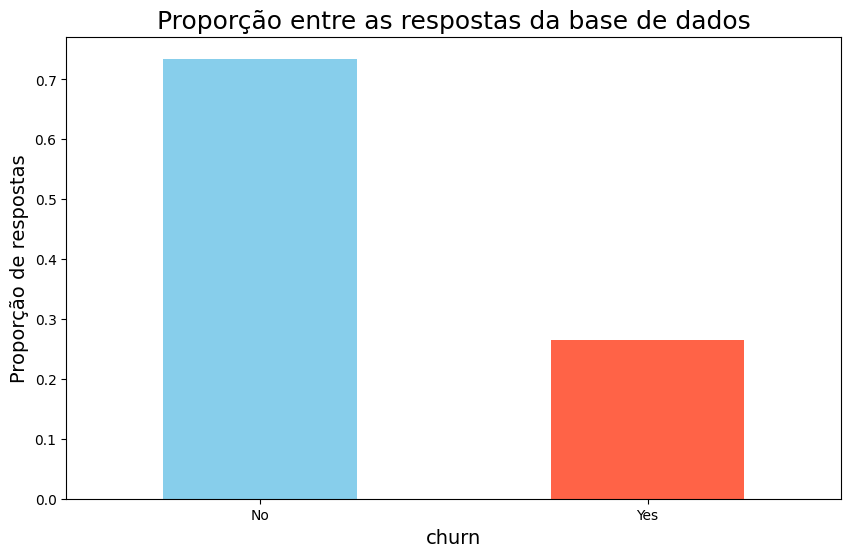

In [54]:
# create a figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

Churn_response = df['Churn'].value_counts(normalize=True)
Churn_response.plot(kind='bar',
                   ax=ax,
                   color=list_cor_plots_churn)
ax.set_title('Proporção entre as respostas da base de dados',fontsize=18, loc='center')
ax.set_xlabel('churn',fontsize=14)
ax.set_ylabel('Proporção de respostas',fontsize=14)
ax.tick_params(rotation='auto')

* Informações de Genero, se é sernior, se possui parceiros e se possui dependentes

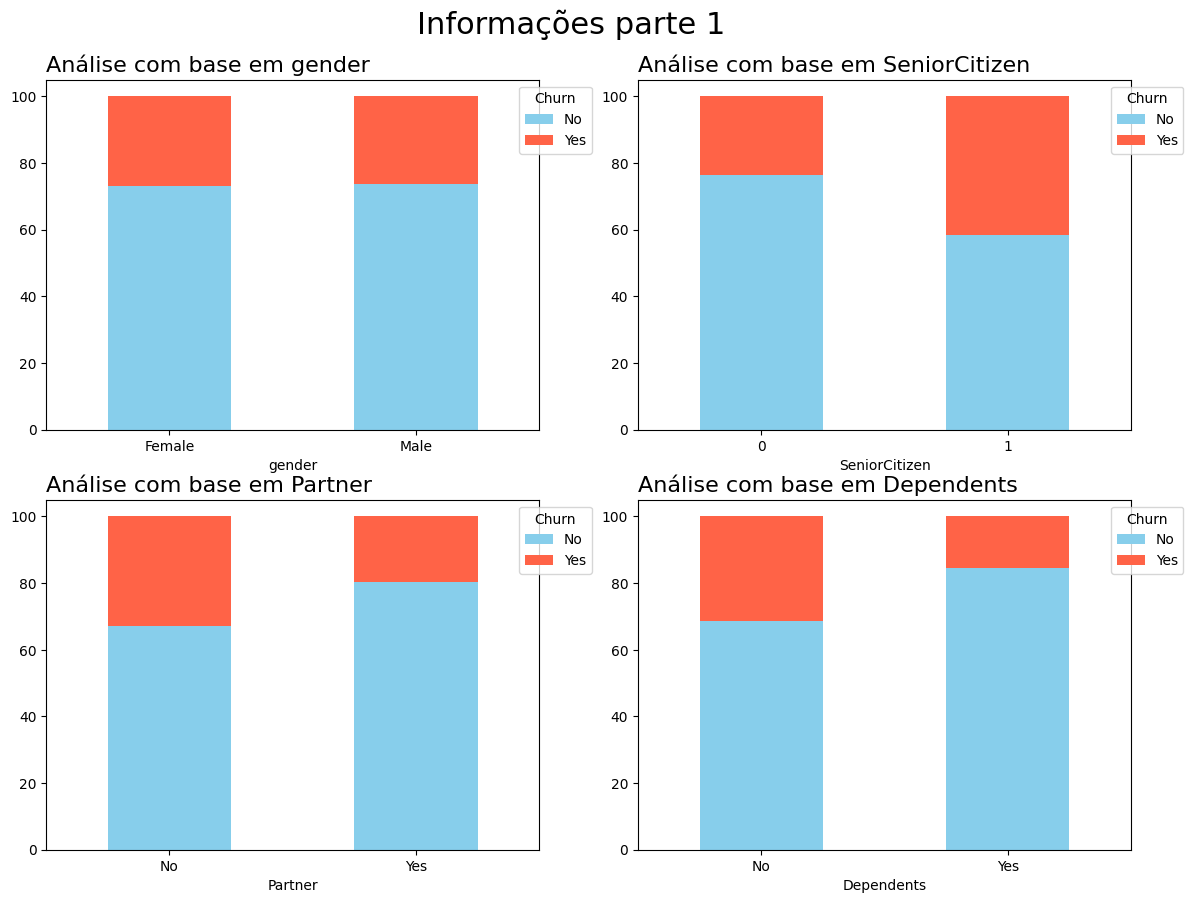

In [55]:
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
plot_percentual_empilhado(demographic_columns, 'Informações parte 1')

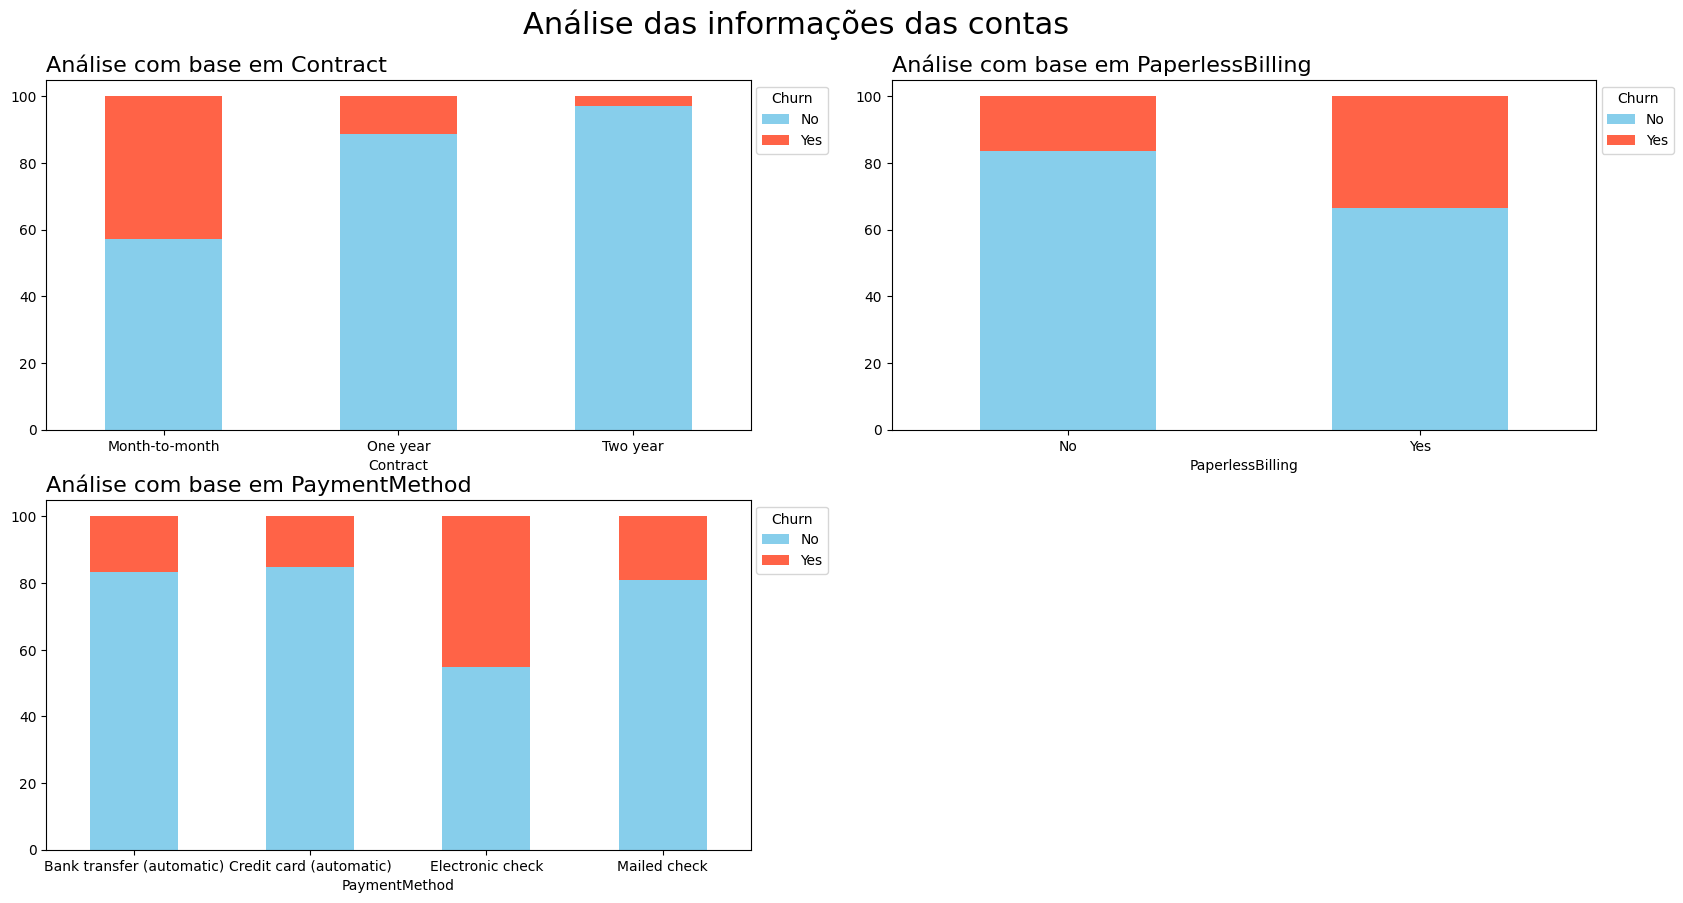

In [57]:
# customer account column names
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# stacked plot of customer account columns
plot_percentual_empilhado(account_columns, 'Análise das informações das contas',20)

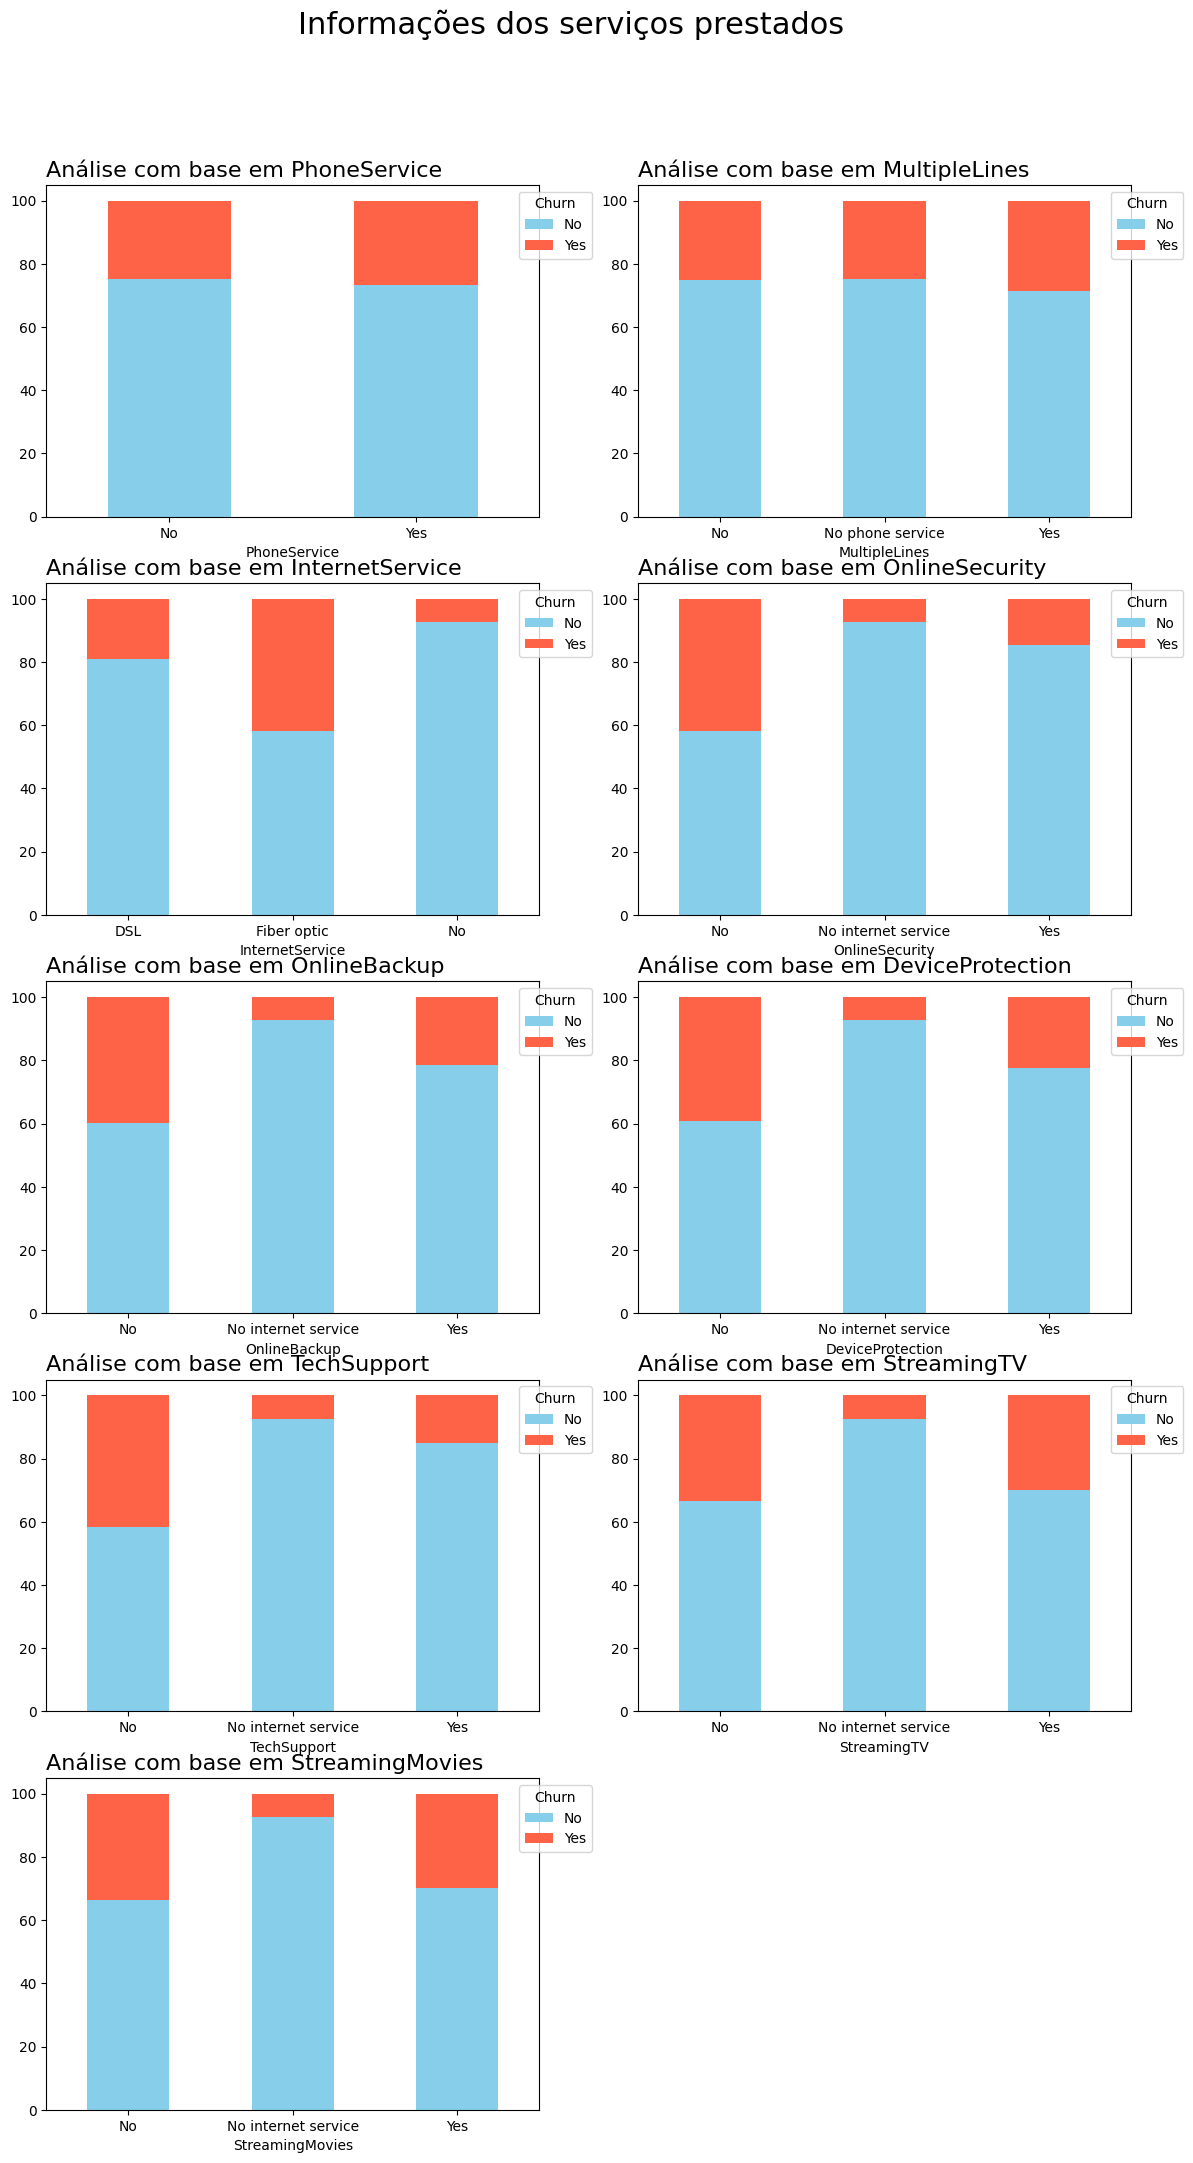

In [59]:
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
plot_percentual_empilhado(services_columns, 'Informações dos serviços prestados')

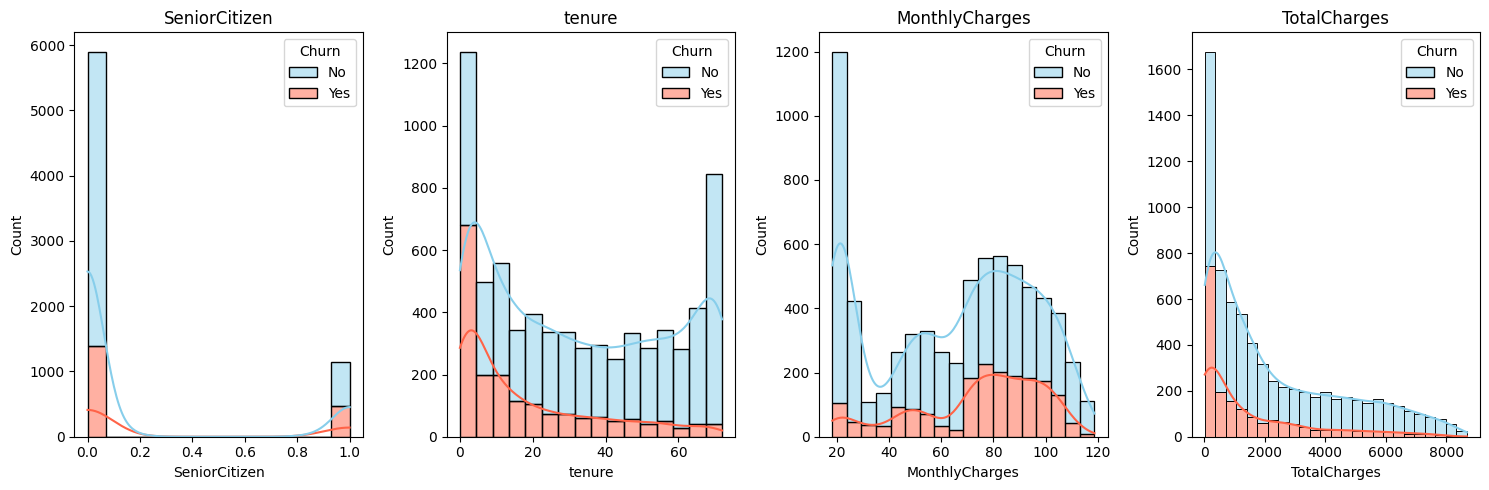

In [66]:
# Filter numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))

# Loop through numerical columns
for i, column in enumerate(numerical_columns):
    # Create a FacetGrid
    g = sns.histplot(data=df, x=column, hue='Churn', ax=axes[i], multiple='stack', kde=True, palette=list_cor_plots_churn)
    g.set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

### Análise da correlação entre as variáveis categóricas existentes

Como estamos tratando de variaveis categóricas não podemos utilizar uma correlação do tipo de peaceman, por isso vamos usar a função do sklearn que mede a dependencia de uma variável com relação a outra.

mutual_info_score

In [69]:
categorical_variables = df.select_dtypes(include=object).drop('Churn', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

Contract            0.098453
OnlineSecurity      0.064677
TechSupport         0.063021
InternetService     0.055574
OnlineBackup        0.046792
PaymentMethod       0.044519
DeviceProtection    0.043917
StreamingMovies     0.032001
StreamingTV         0.031908
PaperlessBilling    0.019194
Dependents          0.014467
Partner             0.011454
MultipleLines       0.000801
PhoneService        0.000072
gender              0.000037
dtype: float64


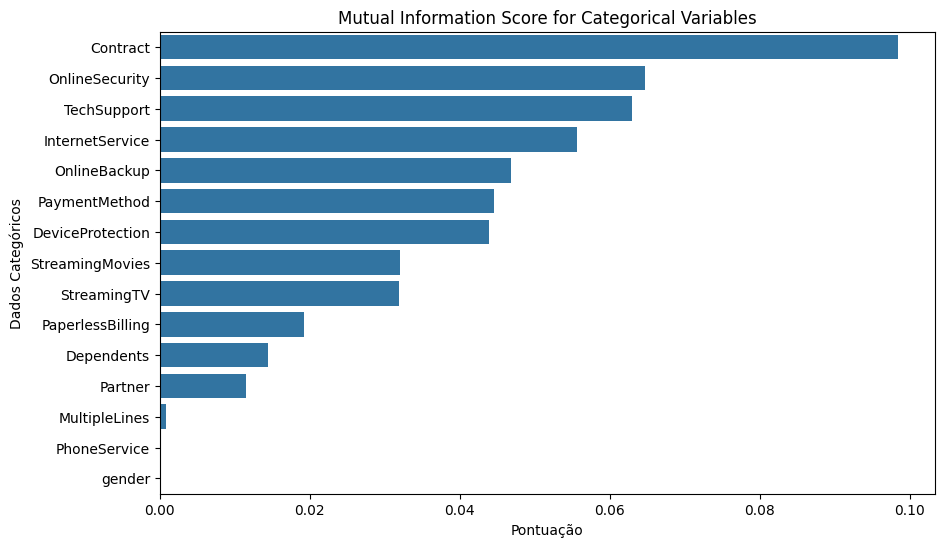

In [73]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.xlabel('Pontuação')
plt.title('Mutual Information Score for Categorical Variables')
plt.ylabel('Dados Categóricos')
plt.show()

**Conclusões parciais**

Vamos fazer um filtro para as colunas que possuem uma pontuação maior que 0.015 e com isso as colunas Dependents, Partner, MultipleLines, PhoneService e gender podem ser removidas do dataset.


### Avaliação da correlação das variaveis numéricas

Vamos fazer um subdataset contendo as informações das variaveis numéricas e a variável que contem a informação do churn

In [78]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_numeric_churn = df[numerical_columns + ['Churn']].copy()
df_numeric_churn['Churn'] = df_numeric_churn['Churn'].map({'No': 0, 'Yes': 1})
df_numeric_churn.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1


In [79]:
corr = df_numeric_churn.corr()
corr.style.background_gradient(cmap='coolwarm')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,0.150889
tenure,0.016567,1.000000,0.247900,0.825880,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,0.193356
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150889,-0.352229,0.193356,-0.199484,1.000000


**Conclusões parciais 2**

Fazendo um filtro de relações acima de 0.15 devemos manter todas as colunas numéricas e ainda conseguimos saber que o total charges possui uma relação linear inversa com a coluna Churn.

#### Vamos fazer uma conversão geral de todas as colunas e repetir o peaceman correlation para avalair

In [82]:
def label_encode_columns(df):
    le = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = le.fit_transform(df[column])
    return df

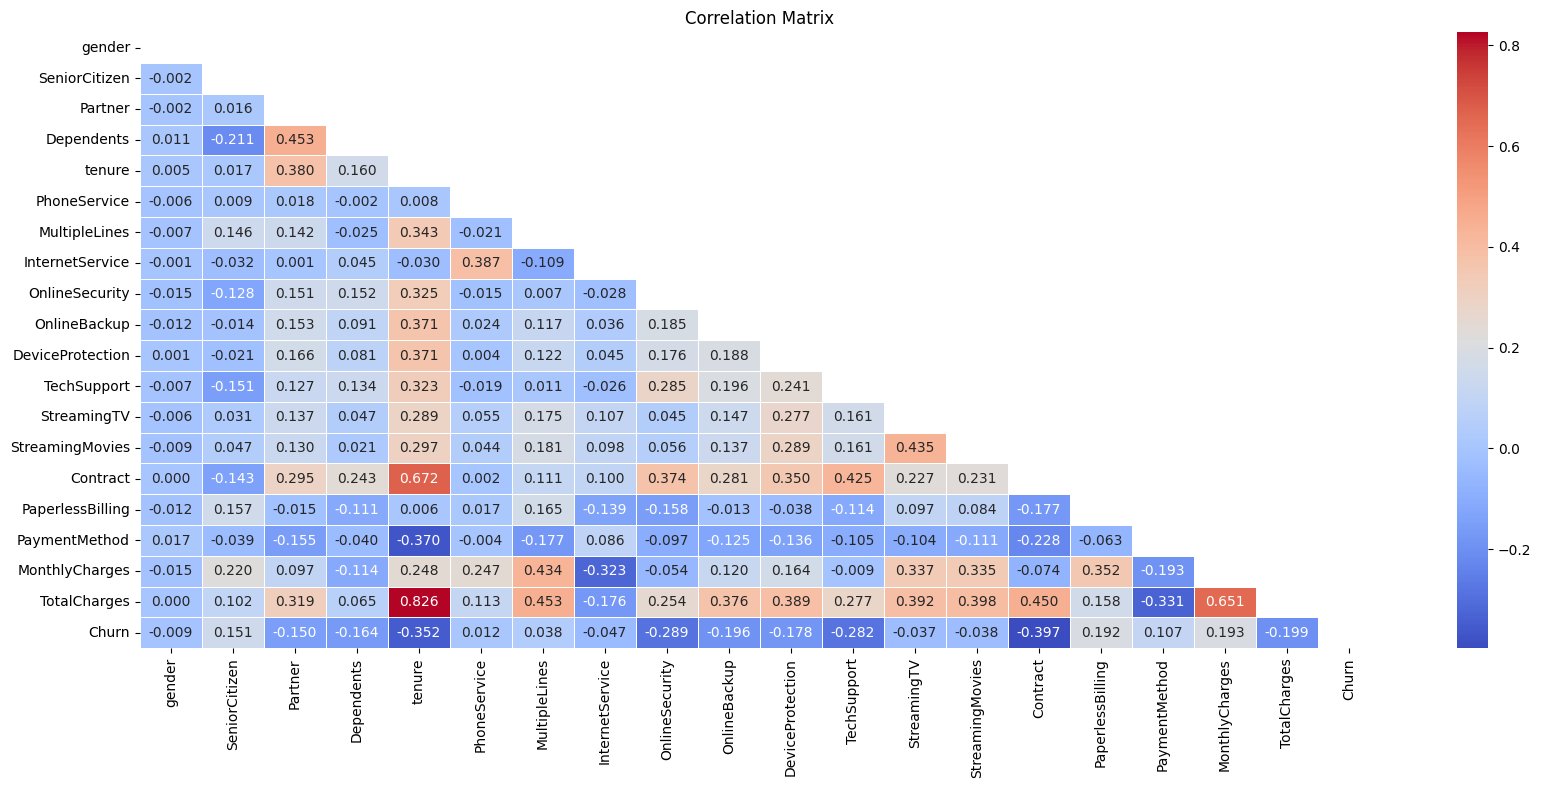

In [86]:
df_full_numerical = label_encode_columns(df)

corr = df_full_numerical.corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".3f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Fazendo uma selação com influência absoluta maior que 0.1

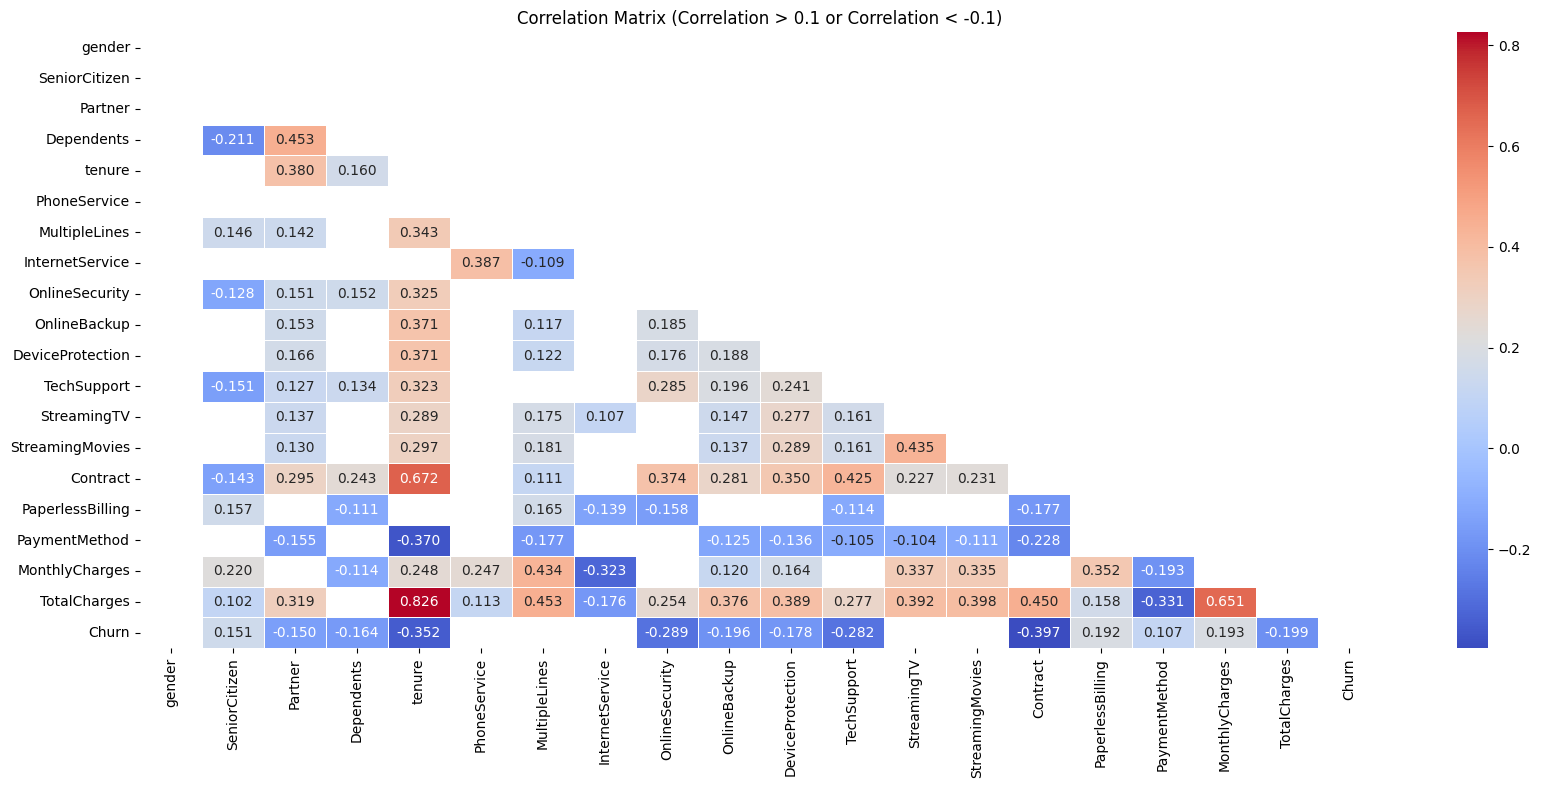

In [90]:
df_full_numerical = label_encode_columns(df)

corr = df_full_numerical.corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Filter correlation matrix
corr_filtered = corr[(corr > 0.1) | (corr < -0.1)]

plt.figure(figsize=(20, 8))
sns.heatmap(corr_filtered, mask=mask, cmap='coolwarm', annot=True, fmt=".3f", linewidths=.5)
plt.title('Correlation Matrix (Correlation > 0.1 or Correlation < -0.1)')
plt.show()

### Conclusões a respeito da EDA

1) Temos uma base muito desbalanceada, mas isso é uma coisa oriunda do fenomeno analisado

2) Não possuimos valores faltantes, o que é uma coisa muito importante, pois se tivesse faltando seria necessário fazer input desses dados faltantes

3) Conseguimos fazer um filtro nas colunas que seram utilizadas no processo de montagem do modelo

### Etapas necessárias para preparar os dados para serem utilizado no treinamento



1.   Carregar a base de dados
2.   Converter "total Charge" para o formato float
3.   Remover a coluna de ID
4.   Fazer a seleção inicial das colunas
5.   Aplicar o hot encoder para transformar de categórico para numérico



In [93]:
colunas_interessantes = ['SeniorCitizen','Partner','Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
                         'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']